In [1]:
import pandas as pd
import anndata
import matplotlib.pyplot as plt

from ALLCools.plot import *
from ALLCools.mcds import MCDS

In [25]:
#parameter part3 
mcds_paths = 'genebody_frac.mcds/genebody'
cell_meta_path = 'L1_clustering_labels.csv'
adata_path = 'adata.with_coords_final_pooled.h5ad'
cluster_col = 'L1'
mc_type = 'CHN'
coord_base = 'umap'
#clustering results
cluster_dmg_path = 'L1_DMG_CHN_pooledoocytes.hdf'

In [26]:
adata = anndata.read_h5ad(adata_path)
adata.obs
# #to match the names from 100kb with genebody sample name

use_cells = adata.obs_names

In [27]:
adata.obs

,leiden,mCGFrac,TotalRead,Group,MT.Fraction,Collection,Year,Type,umap_0,umap_1,L1,L1_proba,AnimalID
cell,,,,,,,,,,,,,
4146045001PO3NC4G4C,0,0.689,2200000,Control,NaN,2,2023,PO,NaN,-2.157124,c0,1,41460
4129944963PO2NC4M1S,0,0.684,2300000,Stressed,NaN,1,2023,PO,NaN,0.059123,c0,1,41299
4520844650PO1NC5A7S,2,0.676,2400000,Stressed,NaN,1,2022,PO,NaN,-1.432278,c0,1,45208
4146045001PO2NC3F4C,1,0.686,2500000,Control,NaN,2,2023,PO,NaN,5.192831,c0,1,41460
4520844650PO2NC3B7S,2,0.680,2600000,Stressed,NaN,1,2022,PO,NaN,-2.382400,c0,1,45208
3905345005PO1NC2I1S,1,0.623,2700000,Stressed,NaN,1,2023,PO,NaN,3.336180,c0,1,39053
4129944963PO1NC3N1S,0,0.626,2900000,Stressed,NaN,2,2023,PO,NaN,2.971206,c0,1,41299
4211144957PO1NC3K4C,2,0.674,3200000,Control,NaN,1,2023,PO,NaN,0.912201,c0,1,42111
4660644938PO2NC3A10C,1,0.680,3600000,Control,NaN,1,2023,PO,NaN,4.396003,c0,1,46606


In [28]:

cluster_dmgs = pd.read_hdf(cluster_dmg_path)
cluster_dmgs['Cluster'].values
cluster_dmgs

,Cluster,Gene,pval,adjpval,logfc,Direction
0,c0,ENSMMUG00000054173,0.000063,0.937666,-1.464418,hypo methylation
1,c0,ENSMMUG00000014197,0.000117,0.937666,-0.893818,hypo methylation
2,c0,ENSMMUG00000051652,0.000158,0.937666,-1.595667,hypo methylation
3,c0,ENSMMUG00000061041,0.000236,0.937666,-1.161796,hypo methylation
4,c0,ENSMMUG00000005377,0.000260,0.937666,1.172605,hyper methylation
...,...,...,...,...,...,...
638,c0,ENSMMUG00000016539,0.048128,0.937666,-0.884620,hypo methylation
639,c0,ENSMMUG00000056787,0.048128,0.937666,-0.938700,hypo methylation
640,c0,ENSMMUG00000010331,0.048128,0.937666,-1.010697,hypo methylation
641,c0,ENSMMUG00000064224,0.049562,0.937666,1.014623,hyper methylation


In [29]:
gene_meta = pd.read_csv('../../GeneMetadata_withGeneName_corrected.csv', index_col=0)
gene_meta

,chrom,start,end,gene_name
gene_id,,,,
ENSMMUG00000023296,chr1,8230,26653,NaN
ENSMMUG00000000634,chr1,71581,83178,ZNF692
ENSMMUG00000037875,chr1,81257,91679,ZNF672
ENSMMUG00000000632,chr1,102661,117835,SH3BP5L
ENSMMUG00000064799,chr1,122995,124202,NaN
...,...,...,...,...
ENSMMUG00000052253,chrY,10095285,10099690,NaN
ENSMMUG00000057875,chrY,10102204,10117522,NaN
ENSMMUG00000063386,chrY,10327102,10371239,NaN


In [30]:
gene_name_to_gene_id = {v: k for k, v in gene_meta['gene_name'].items()}
gene_meta.index.name = 'gene_id'
#gene_name_to_gene_id

In [31]:

gene_frac_da = MCDS.open(f'genebody_frac.mcds/',
                                 use_obs=use_cells)[f'genebody_da_frac']
gene_frac_da = gene_frac_da.sel(mc_type=mc_type).load()
gene_frac_da
# Assuming gene_frac_da is an AnnData object
# Extract the 'cell' column as a Series
cell_series = gene_frac_da['cell']
cell_series

gene_frac_da

<xarray.DataArray 'genebody_da_frac' (cell: 46, genebody: 26940)>
array([[0.16402224, 0.9354609 , 0.43139675, ..., 0.29956332, 0.60357475,
        1.        ],
       [1.2874871 , 0.51957   , 2.0697443 , ..., 0.0954394 , 0.22383848,
        1.        ],
       [1.286777  , 0.53514844, 0.37567917, ..., 0.809594  , 1.5264757 ,
        0.6071012 ],
       ...,
       [0.7386269 , 1.1425979 , 1.3156397 , ..., 0.819651  , 1.0988975 ,
        1.2289959 ],
       [0.8859212 , 0.6855077 , 0.9659372 , ..., 1.1219798 , 0.60662925,
        0.82379097],
       [1.1859779 , 0.8704122 , 0.9484311 , ..., 0.71249276, 0.8388823 ,
        1.0369809 ]], dtype=float32)
Coordinates:
  * cell               (cell) <U20 '4146045001PO3NC4G4C' ... '4123744641PO1NC...
  * genebody           (genebody) <U18 'ENSMMUG00000023296' ... 'ENSMMUG00000...
    genebody_chrom     (genebody) <U5 'chr1' 'chr1' 'chr1' ... 'chrX' 'chrX'
    genebody_cov_mean  (genebody) float64 964.3 1.281e+03 ... 261.2 69.3
    genebody_end       (genebody) int64 26653 83178 ... 151987003 152565575
    genebody_start     (genebody) int64 8230 71581 81257 ... 151983199 152564067
    mc_type            <U3 'CHN'

In [32]:
# run this cell if Jupyter Notebook environment on your local machine does not recognize the zarr engine, which is required by xarray to open the dataset. 
#!pip install zarr
# #conda install -c conda-forge zarr
# pip install --upgrade xarray
# conda update xarray

In [33]:
def get_gene_values_by_name(gene_name):
    data = gene_frac_da.sel(genebody=gene_name_to_gene_id[gene_name]).to_pandas()
    data.name = gene_name
    return data

In [34]:
def plot_cluster_and_genes(cluster, cell_meta, cluster_col, genes_data,
                           coord_base='umap', ncols=5, axes_size=3, dpi=150, hue_norm=(0, 1)):
    ncols = max(2, ncols)
    nrows = 1 + (genes_data.shape[1] - 1) // ncols + 1

    # figure
    fig = plt.figure(figsize=(ncols * axes_size, nrows * axes_size), dpi=dpi)
    gs = fig.add_gridspec(nrows=nrows, ncols=ncols)

    # cluster axes
    ax = fig.add_subplot(gs[0, 0])
    categorical_scatter(data=cell_meta,
                        ax=ax,
                        coord_base=coord_base,
                        axis_format=None,
                        hue=cluster_col,
                        palette='tab20')
    ax.set_title('All Clusters')
    ax = fig.add_subplot(gs[0, 1])
    categorical_scatter(data=cell_meta,
                        ax=ax,
                        coord_base=coord_base,
                        hue=cell_meta[cluster_col] == cluster,
                        axis_format=None,
                        palette={
                            True: 'red',
                            False: 'lightgray'
                        })
    ax.set_title('This Cluster')

    # gene axes
    for i, (gene, data) in enumerate(genes_data.items()):
        col = i % ncols
        row = i // ncols + 1
        ax = fig.add_subplot(gs[row, col])

        if ax.get_subplotspec().is_first_col() and ax.get_subplotspec().is_last_row():
            axis = 'tiny'
        else:
            axis = None

        continuous_scatter(ax=ax,
                           data=cell_meta,
                           hue=data,
                           axis_format=axis,
                           hue_norm=hue_norm,
                           coord_base=coord_base)
        ax.set_title(f'{data.name}')
    fig.suptitle(f'Cluster {cluster} Top Markers')
    return fig

In [35]:
cluster = 'c0'
genes = cluster_dmgs[cluster_dmgs['Cluster'] == cluster].sort_values(
    'logfc', ascending=False)[:1000]
#genes.to_csv('c0_chn_TopmarkerC0_643.csv')
genes

,Cluster,Gene,pval,adjpval,logfc,Direction
44,c0,ENSMMUG00000063528,0.002912,0.937666,2.421987,hyper methylation
399,c0,ENSMMUG00000013450,0.025988,0.937666,2.394351,hyper methylation
337,c0,ENSMMUG00000049292,0.021367,0.937666,2.365200,hyper methylation
489,c0,ENSMMUG00000059099,0.032449,0.937666,2.296775,hyper methylation
157,c0,ENSMMUG00000062676,0.009278,0.937666,2.225861,hyper methylation
...,...,...,...,...,...,...
294,c0,ENSMMUG00000052616,0.018080,0.937666,-2.138185,hypo methylation
308,c0,ENSMMUG00000044782,0.018699,0.937666,-2.359001,hypo methylation
17,c0,ENSMMUG00000021358,0.001622,0.937666,-3.285595,hypo methylation
585,c0,ENSMMUG00000060590,0.042737,0.937666,-4.153478,hypo methylation


In [36]:
# Convert 'Gene' column from DataFrame to a list
genes_list = genes['Gene'].dropna().unique().tolist()  # Drop NaNs & ensure unique values

# Ensure 'genebody' exists in gene_frac_da
if 'genebody' not in gene_frac_da.coords:
    raise ValueError("genebody coordinate is missing in gene_frac_da")

# Select gene data from gene_frac_da using valid gene list
genes_data = gene_frac_da.sel(genebody=genes_list).to_pandas()

In [37]:

genes_data.columns = genes_data.columns.map(gene_meta['gene_name'])

# Save the column names as a DataFrame and then to a CSV file
column_names_df = pd.DataFrame(genes_data.columns)

# Save the column names to CSV
#column_names_df.to_csv("06c_TopmarkerC2_cpg__genenames.168.csv", index=False)

In [15]:
fig = plot_cluster_and_genes(cluster=cluster,
                             cell_meta=adata.obs,
                             cluster_col=cluster_col,
                             genes_data=genes_data,

                             coord_base='umap',
                             ncols=5,
                             axes_size=3,
                             dpi=250,
                             hue_norm=(0, 1))

Error in callback <function _draw_all_if_interactive at 0x13738d3cce50> (for post_execute):


ValueError: Image size of 3750x97500 pixels is too large. It must be less than 2^16 in each direction.

ValueError: Image size of 3750x97500 pixels is too large. It must be less than 2^16 in each direction.

<Figure size 3750x97500 with 1288 Axes>

In [16]:
fig.savefig(f'{cluster}.CGN_C0_TopMarker.png', bbox_inches='tight')

ValueError: Image size of 3750x97500 pixels is too large. It must be less than 2^16 in each direction.

In [38]:
cell_meta = adata.obs
cell_meta

,leiden,mCGFrac,TotalRead,Group,MT.Fraction,Collection,Year,Type,umap_0,umap_1,L1,L1_proba,AnimalID
cell,,,,,,,,,,,,,
4146045001PO3NC4G4C,0,0.689,2200000,Control,NaN,2,2023,PO,NaN,-2.157124,c0,1,41460
4129944963PO2NC4M1S,0,0.684,2300000,Stressed,NaN,1,2023,PO,NaN,0.059123,c0,1,41299
4520844650PO1NC5A7S,2,0.676,2400000,Stressed,NaN,1,2022,PO,NaN,-1.432278,c0,1,45208
4146045001PO2NC3F4C,1,0.686,2500000,Control,NaN,2,2023,PO,NaN,5.192831,c0,1,41460
4520844650PO2NC3B7S,2,0.680,2600000,Stressed,NaN,1,2022,PO,NaN,-2.382400,c0,1,45208
3905345005PO1NC2I1S,1,0.623,2700000,Stressed,NaN,1,2023,PO,NaN,3.336180,c0,1,39053
4129944963PO1NC3N1S,0,0.626,2900000,Stressed,NaN,2,2023,PO,NaN,2.971206,c0,1,41299
4211144957PO1NC3K4C,2,0.674,3200000,Control,NaN,1,2023,PO,NaN,0.912201,c0,1,42111
4660644938PO2NC3A10C,1,0.680,3600000,Control,NaN,1,2023,PO,NaN,4.396003,c0,1,46606


In [39]:
gene_data = genes_data.transpose()
gene_data

cell,4146045001PO3NC4G4C,4129944963PO2NC4M1S,4520844650PO1NC5A7S,4146045001PO2NC3F4C,4520844650PO2NC3B7S,3905345005PO1NC2I1S,4129944963PO1NC3N1S,4211144957PO1NC3K4C,4660644938PO2NC3A10C,4139144923PO4NC4K3C,...,4566944700PO2NC5P8C,4146044643PO1NC5O3C,4456444991PO1NC3H6C,4139144923PO2NC3I3C,4146044643PO2NC5P3C,4139144650PO3NC3E3C,4566944700PO3NC4A9C,4302844664PO2NC5K5C,4139144923PO1NC3H3C,4123744641PO1NC4N2S
genebody,,,,,,,,,,,,,,,,,,,,,
NaN,1.000000,1.000000,6.652948,1.000000,1.000000,1.000000,1.000000,0.603401,1.000000,1.000000,...,0.161800,0.220059,0.739863,0.404086,0.325903,0.494159,0.517399,1.684132,1.709867,1.244132
TAF6,1.927486,10.000000,6.238045,0.799182,1.964366,2.272873,0.379461,1.818350,1.932692,2.469244,...,1.231308,0.938983,1.608996,0.749973,1.036955,1.226039,1.875971,1.308920,1.134890,1.291485
REG1A,0.481430,4.785762,0.408219,1.650931,0.438106,3.186583,6.368715,0.973771,0.956760,0.410927,...,0.665826,0.606957,0.418558,1.469327,0.602795,1.458614,2.406334,0.461458,0.907638,1.217062
NaN,0.760305,1.491771,9.108463,0.396400,1.677332,0.585828,3.546714,1.000000,2.300735,0.346060,...,0.459508,0.839012,0.619305,1.784128,3.068366,0.748966,0.604833,0.127765,0.940077,3.082659
NaN,0.240812,0.927586,1.954099,1.088329,2.028915,1.625677,1.995094,0.286356,0.177544,1.939664,...,1.529007,1.193049,0.320624,0.807530,1.694871,0.815898,0.770839,0.605995,0.889843,1.754010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
NaN,1.000000,0.241320,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.588059,1.000000,...,1.664808,9.214995,2.464500,1.630668,0.243272,0.280970,0.749105,3.278239,0.885522,0.547061
NaN,0.365772,0.223838,0.859425,0.876705,0.560606,0.595697,1.000000,6.807686,0.493904,2.098091,...,0.700101,1.166530,0.698741,1.136527,2.679451,0.821566,3.046692,0.998784,6.697246,0.803046
AGGF1,1.221269,1.525548,0.837893,2.196003,0.916742,7.018362,0.750564,2.534549,1.464216,10.000000,...,5.092737,1.454740,0.926803,4.007621,1.440537,10.000000,5.020664,1.188117,2.334809,1.045746


In [40]:
# Sort metadata
metadata_sorted = cell_meta.sort_values(by=['L1', 'Group', 'Type'])

# Reorder gene_data columns to match the sorted metadata
gene_data_sorted = gene_data[metadata_sorted.index]

gene_data_sorted.to_csv("mch_dms_geneindmatrix.csv")

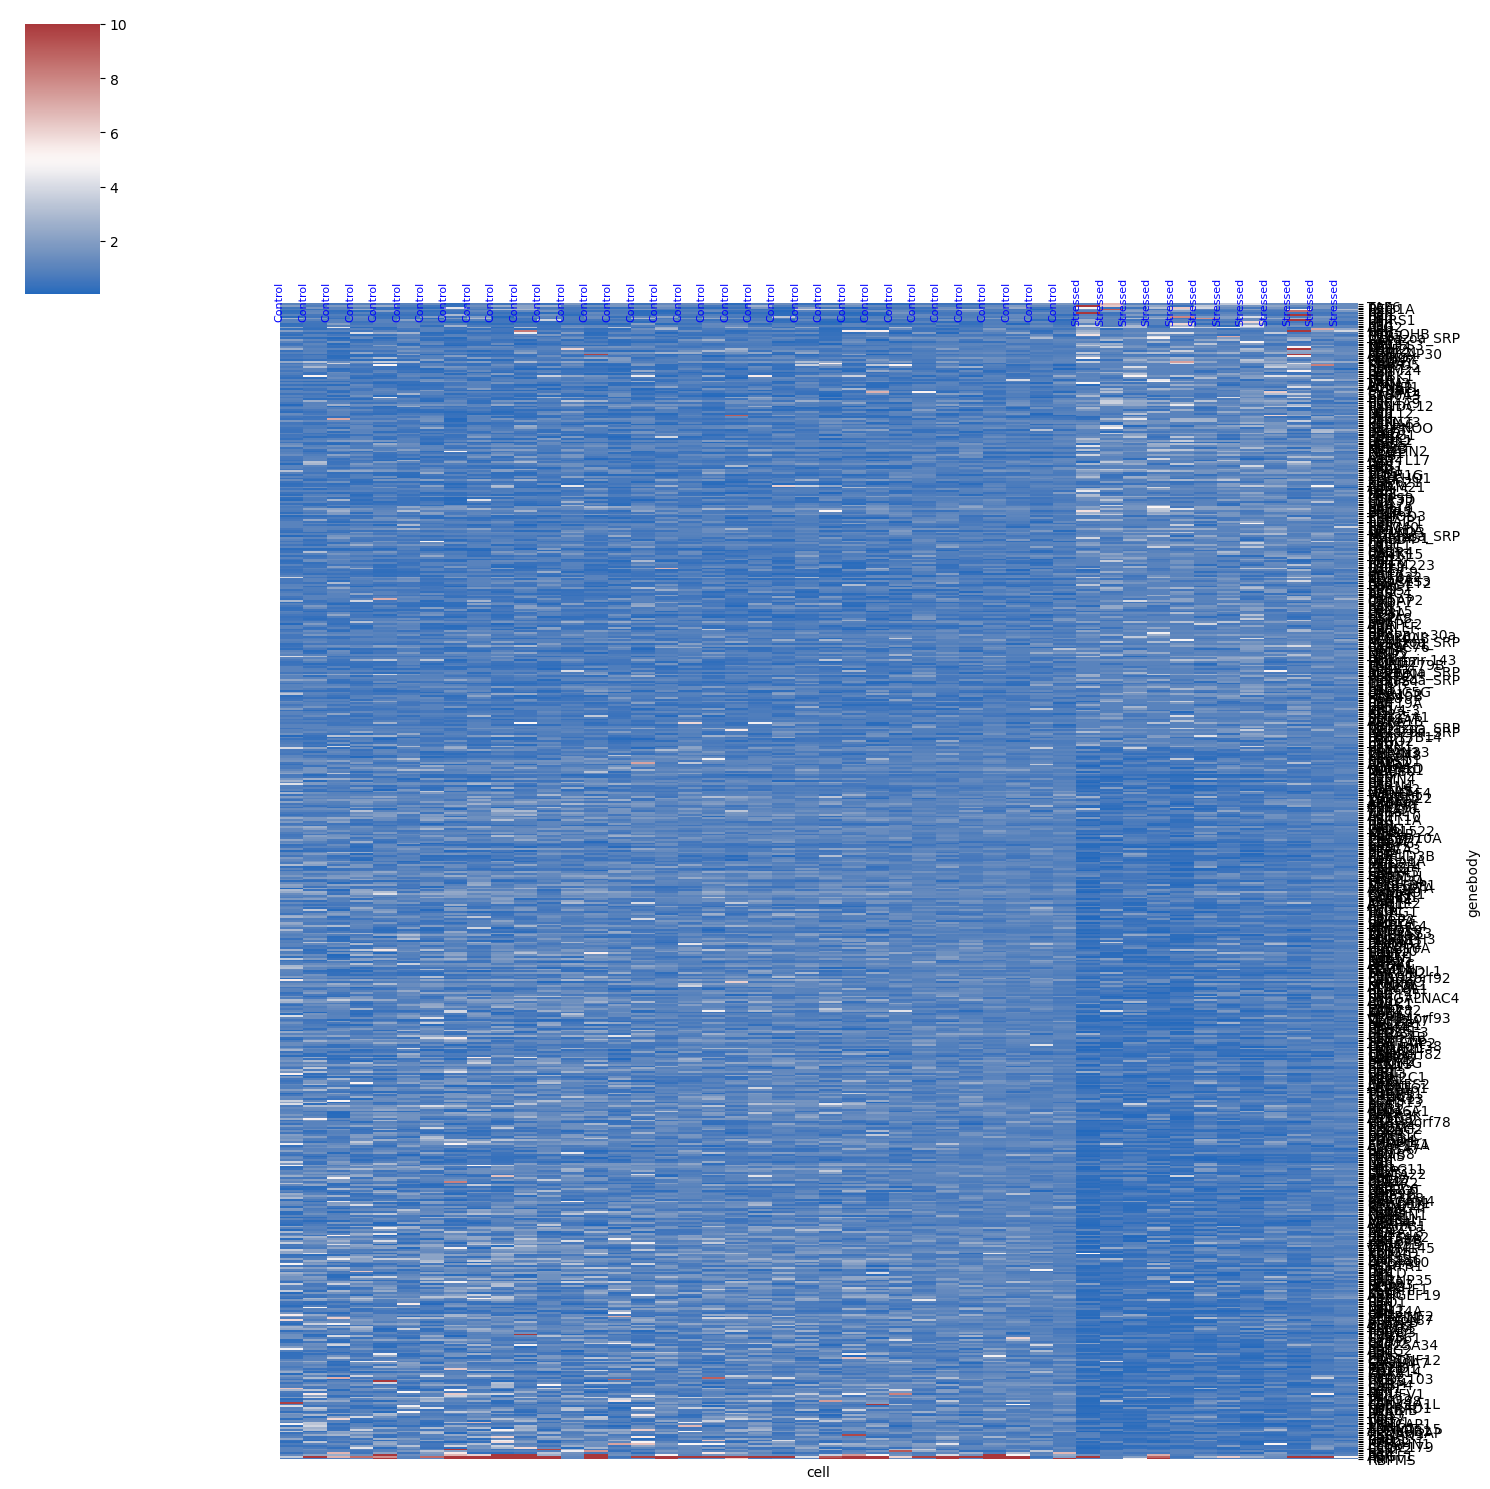

In [41]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Extract the cluster (L1) and group names for labeling
cluster_labels = metadata_sorted['L1'].values
group_labels = metadata_sorted['Group'].values

# Plot the heatmap
g = sns.clustermap(
    gene_data_sorted,
    row_cluster=False,  # Do not cluster genes
    col_cluster=False,  # Columns already organized
    cmap='vlag',  # Colormap for the heatmap
    xticklabels=False,  # Hide x-axis labels to emphasize metadata
    yticklabels=True,  # Show y-axis labels for genes
    figsize=(15, 15)  # Adjust figure size as needed
)

# Add the cluster and group labels on top of the heatmap
for label in range(g.data2d.shape[1]):
       g.ax_heatmap.text(label, -1.5, group_labels[label], 
                      ha='center', va='center', rotation=90, fontsize=8, color='blue')

# Adjust layout to make room for the labels
g.ax_heatmap.set_xticks([])  # Hide the default x-axis ticks
g.ax_heatmap.set_xticklabels([])  # Hide the default x-axis labels
# Save the figure before displaying it
plt.savefig('c0_chn_Topmarkers_heatmap_steCont.png', dpi=300, bbox_inches='tight')
plt.show()


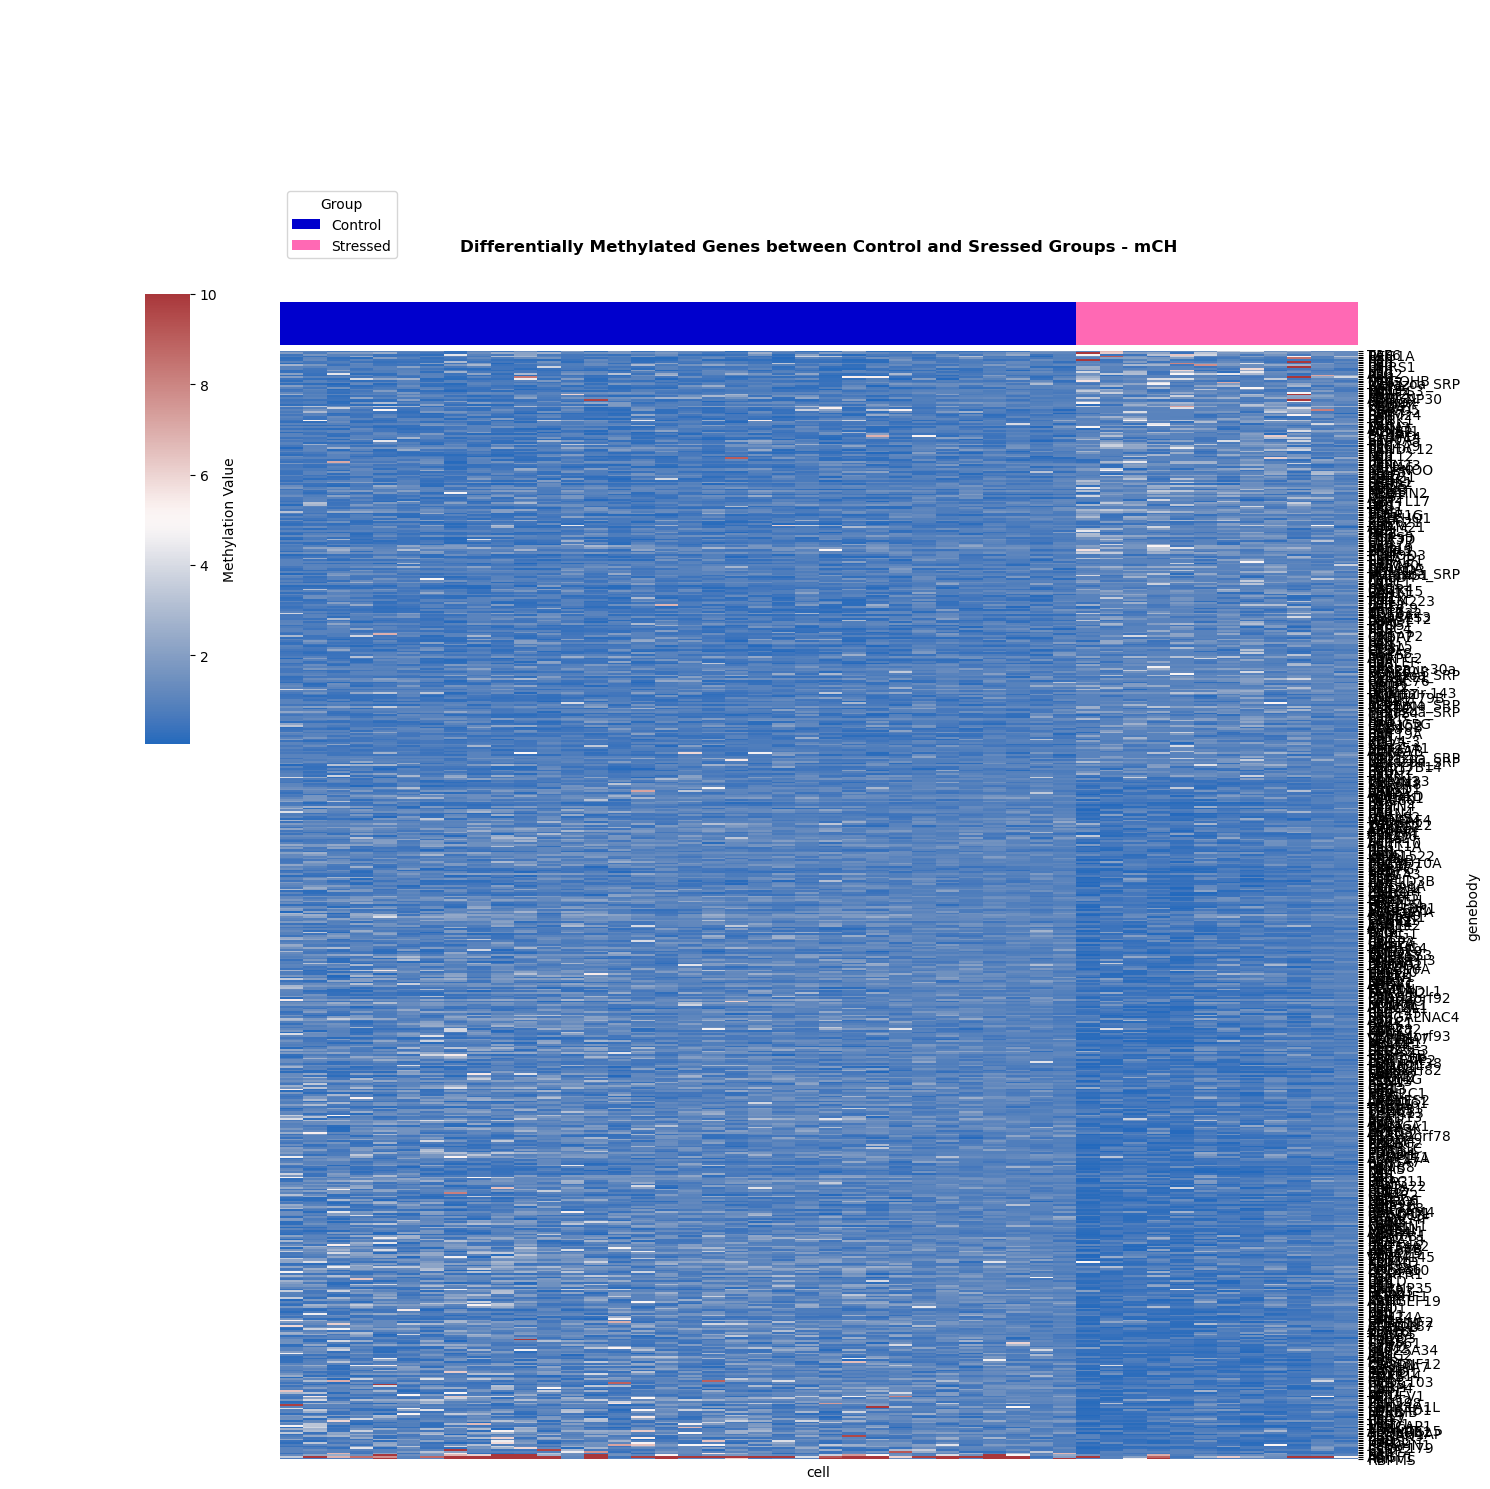

In [42]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.patches import Patch

# ----------------------------------------------------------------------------
# 1) Example group mapping for "Stressed" and "Control"
# ----------------------------------------------------------------------------
group_colors_map = {
    "Control": "mediumblue",
    "Stressed": "hotpink"
}

# Create col_colors in the order of columns in gene_data_sorted
col_colors = [group_colors_map[g] for g in metadata_sorted['Group']]

# ----------------------------------------------------------------------------
# 2) clustermap with custom colorbar position
# ----------------------------------------------------------------------------
g = sns.clustermap(
    gene_data_sorted,
    row_cluster=False,
    col_cluster=False,
    cmap='vlag',
    xticklabels=False,
    yticklabels=True,
    figsize=(15, 15),
    col_colors=col_colors,
    # Move colorbar to the left side: (x, y, width, height)
    cbar_pos=(0.1, 0.5, 0.03, 0.3),
    cbar_kws={"label": "Methylation Value"}  # Label the color scale
)

# ----------------------------------------------------------------------------
# 4) Label the top color bar with "Group"
# ----------------------------------------------------------------------------
g.ax_col_dendrogram.text(
    0.5, 0.15,                 # X, Y position in fraction of that axes
    "Differentially Methylated Genes between Control and Sressed Groups - mCH",
    ha='center', va='bottom',
    transform=g.ax_col_dendrogram.transAxes,
    fontsize=12, fontweight='bold'
)

# ----------------------------------------------------------------------------
# 5) Add legend for groups on the right, higher up
# ----------------------------------------------------------------------------
legend_patches = [
    Patch(facecolor=color, label=grp) 
    for grp, color in group_colors_map.items()
]

# Move the legend to the right side, but a bit higher so it doesn’t overlap
g.ax_heatmap.legend(
    handles=legend_patches,
    title='Group',
    bbox_to_anchor=(0.0001, 1.15),  # (x, y) position
    loc='upper left'
)

# If the legend still overlaps, you can add:
# plt.subplots_adjust(right=0.8)  # Give extra space on the right
plt.savefig('heatmap_chg_publevel.png', dpi=300, bbox_inches='tight')

plt.show()
